In [1]:
from matplotlib import pyplot
import matplotlib

In [2]:
from PySDM_examples.deJong_Mackay_2022.settings import Settings
from PySDM_examples.deJong_Mackay_2022.simulation import run_box_breakup, run_box_NObreakup
from PySDM.physics import si
from atmos_cloud_sim_uj_utils import show_plot

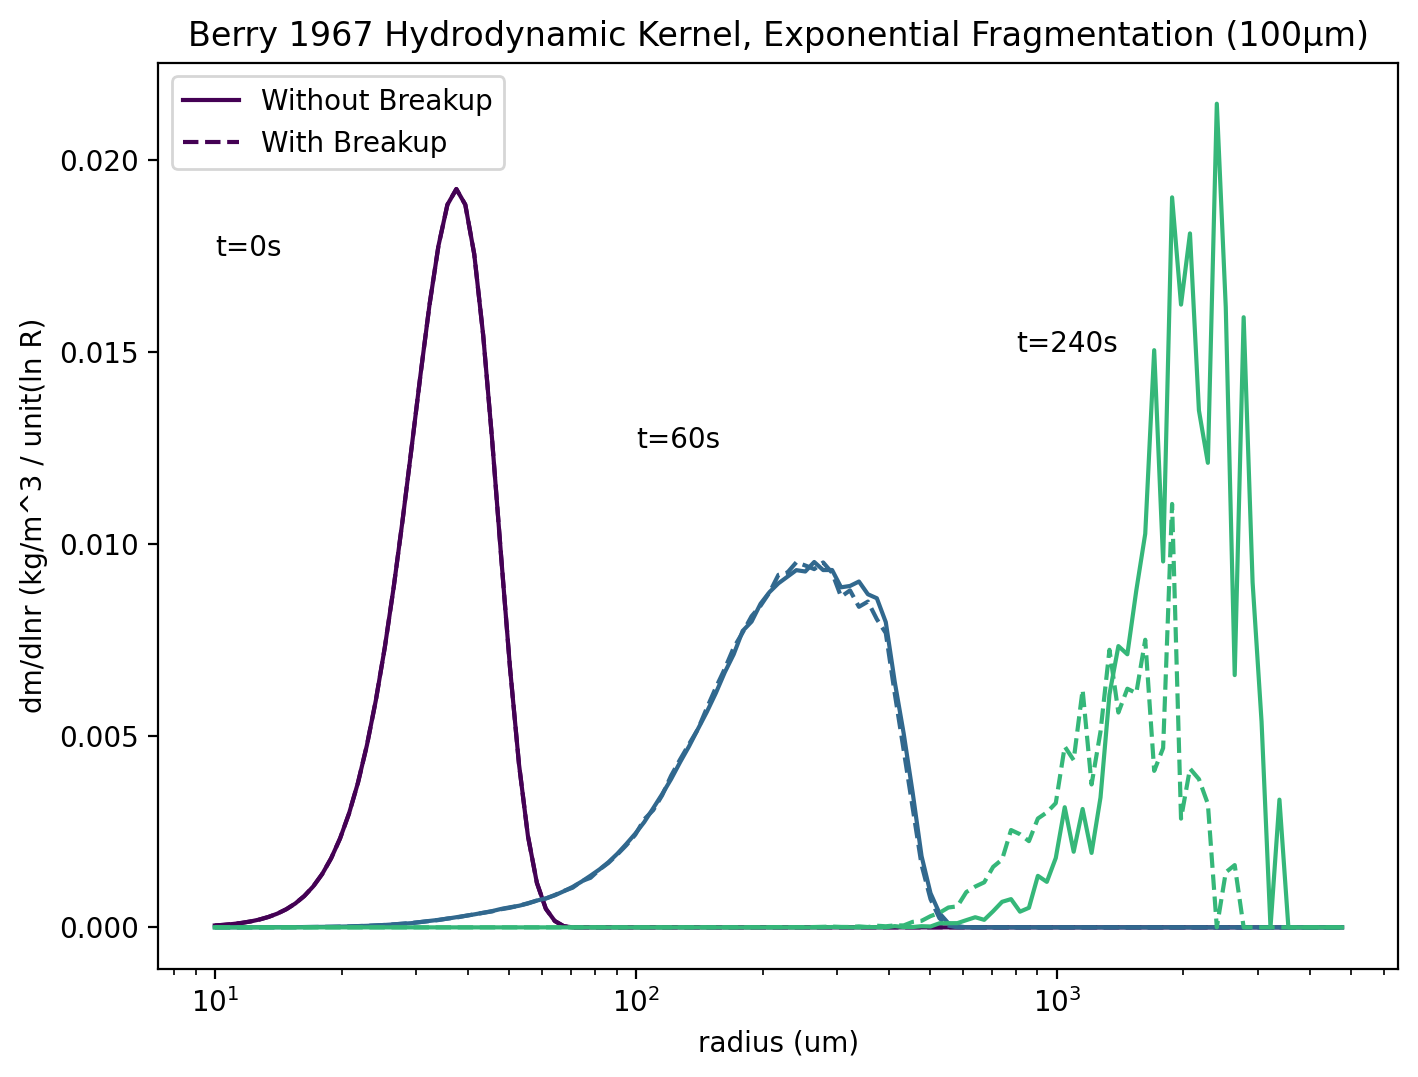

HTML(value="<a href='./fig1.pdf' target='_blank'>./fig1.pdf</a><br>")

In [5]:
settings = Settings()
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []
t_steps = [0, 60, 240]
pyplot.figure(figsize=(8,6),dpi=200)
for (i,step) in enumerate(t_steps):
    (x,y) = run_box_NObreakup(settings, step)
    pyplot.plot(x[0],y[0]*settings.rho,color=cmap(i/len(t_steps)),linestyle='-')
    legend_entries.append("Without Breakup")

    (x,y) = run_box_breakup(settings, step)
    pyplot.plot(x[0],y[0]*settings.rho,color=cmap(i/len(t_steps)),linestyle='--')
    legend_entries.append("With Breakup")

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend(legend_entries[0:2])
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Berry 1967 Hydrodynamic Kernel, Exponential Fragmentation (100µm)")
pyplot.savefig('fig1.png')
show_plot('fig1.pdf')